# Project: Entertainment through Clever Cogs

This system is provided by a company called Blackwood Homes and Care to their customers. What they want to know is how their customers use the entertainment, are their differences, between age, gender, disability, time of use, independent living or care home residents and location across Scotland. 

In this project I got three sets of CSV data, the files are "01_CCDate2018-2021.csv"（It has the entertainment data in, there are a few things in the categories which are services not data, such as "ask For" and "blocked sink"）, "02_Users2021.csv"（this is the data on where people live and their ages） and "03_CustomerMedicalConditions04Nov21.csv"（Including medical info/user health status）.

Since the project data processing is done by teamwork, we have assigned different perspectives to analyze individual variables and the relationship between different variables. In this data analysis, I will mainly conduct data cleaning, visualization and hypothesis from the perspective of "location" variables.

# Ⅰ. Data Describe 

#### Q1: What is the general type of the data (tabular, network, geographical, textual, etc.)

Answers to Q1：Tabular

#### Q2: How large and complex is it(rows/colunms, size, variation, structure)

In [1]:
import pandas as pd
import numpy as np
import os
data_ccdate = pd.read_csv('01_CCDate2018-2021.csv')
data_users = pd.read_csv('02_Users2021.csv')
data_medical = pd.read_csv('03_CustomerMedicalConditions04Nov21.csv')

In [2]:
data_ccdate.shape

(654915, 9)

In [3]:
data_users.shape

(3641, 6)

In [4]:
data_medical.shape

(1311, 7)

In [5]:
os.path.getsize('01_CCDate2018-2021.csv')

84461236

In [6]:
os.path.getsize('02_Users2021.csv')

381271

In [7]:
os.path.getsize('03_CustomerMedicalConditions04Nov21.csv')

58328

Answers to Q2：'01_CCDate2018-2021.csv' includes 654915 rows, 9 columns. It is 84461236 bytes;
'02_Users2021.csv' includes 3641 rows, 6 columns. It is 381271 bytes;
'03_CustomerMedicalConditions04Nov21.csv' includes 1311 rows, 7 columns. It is 58328 bytes.

#### Q3: What fields and data types are present (max/min, levels for categorical values). 

At this stage, I just unified some incorrect formats and contents of data, but I didn't process the missing data. Because I haven't known what will be analyzed in the next phase. I will process the missing data during the data analysis phase.

##### For '01_CCDate2018-2021.csv' 

In [8]:
data_ccdate.head()

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL
0,11/1/21 5:10 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Comfort Break,Services,-1|329|10|Comfort Break|1|,LIST
1,11/1/21 5:10 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Ask For,Category,NaN,NaN
2,11/1/21 5:08 PM,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care Team,Category,NaN,NaN
3,11/1/21 5:08 PM,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care,Category,NaN,NaN
4,11/1/21 5:07 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Family & Friends,Internet,NaN,contacts.asp


In [9]:
data_ccdate.dtypes

Time            object
VisitorID       object
ExternalID     float64
Role            object
Location        object
Link Title      object
Link  Type      object
ContentInfo     object
URL             object
dtype: object

In [10]:
data_ccdate.count() / data_ccdate.shape[0]

Time           1.000000
VisitorID      1.000000
ExternalID     0.825813
Role           0.998401
Location       0.977611
Link Title     1.000000
Link  Type     1.000000
ContentInfo    0.036803
URL            0.494857
dtype: float64

In [11]:
data_ccdate['Time'] = pd.to_datetime(data_ccdate['Time'])

In [12]:
data_ccdate.Time.head()

0   2021-11-01 17:10:00
1   2021-11-01 17:10:00
2   2021-11-01 17:08:00
3   2021-11-01 17:08:00
4   2021-11-01 17:07:00
Name: Time, dtype: datetime64[ns]

In [13]:
max(data_ccdate['Time'])

Timestamp('2021-11-01 17:10:00')

In [14]:
min(data_ccdate['Time'])

Timestamp('2018-01-01 00:20:00')

(1) In '01_CCDate2018-2021.csv', data types include Datetime('Time'(from 2018-01-01 00:20:00 to 2021-11-01 17:10:00)), Float('ExternalID'), String('VisitorID', 'Role', 'Location', 'Link Title', 'Link Type', 'URL').

##### For '02_Users2021.csv' 

In [15]:
data_users.head()

,User ID,VisitorID,ExternalID,Birth date,Gender,Location
0,213,7447300C-B772-4779-9AC8-0A28B5BBBFF4,NaN,NaN,Male,NaN
1,298,F298F6B9-77E2-459D-96EE-F588FA2BC5B1,NaN,NaN,Male,NaN
2,314,5E896124-3F0E-4D01-915D-BAE9B3F1A39A,NaN,NaN,Male,NaN
3,370,E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C,999.0,NaN,Male,Aberdeen Council
4,387,D7686862-D926-49CB-93CA-B8676CA2A91A,NaN,NaN,Male,NaN


In [16]:
data_users.dtypes

User ID         int64
VisitorID      object
ExternalID    float64
Birth date     object
Gender         object
Location       object
dtype: object

In [17]:
data_users.count() / data_users.shape[0]

User ID       1.000000
VisitorID     1.000000
ExternalID    0.731667
Birth date    0.461137
Gender        1.000000
Location      0.830541
dtype: float64

(2) In '02_Users2021.csv', data types include Int('User ID'), Float('ExternalID'), String('VisitorID', 'Birth date', 'Gender', 'Location').

##### For '03_CustomerMedicalConditions04Nov21.csv' 

In [18]:
data_medical.head()

,External ID,CleverCogsUserId,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,4703,685,F,7月4日,56.0,NaN,Spina Bifida
1,4704,772,F,6月21日,81.0,NaN,COPD
2,4706,1128,F,2月25日,90.0,NaN,Dementia
3,4707,1159,F,9月18日,39.0,NaN,Brain Injury
4,4708,784,F,12月20日,90.0,NaN,NaN


In [19]:
data_medical.dtypes

External ID             object
CleverCogsUserId         int64
Gender                  object
DateOfBirth             object
Age                    float64
StaffPlanConditions     object
CareSysCondition        object
dtype: object

In [20]:
data_medical.count() / data_medical.shape[0]

External ID            1.000000
CleverCogsUserId       1.000000
Gender                 1.000000
DateOfBirth            0.999237
Age                    0.999237
StaffPlanConditions    0.114416
CareSysCondition       0.745995
dtype: float64

In [21]:
data_medical['Gender'].value_counts()

F    705
M    531
U     75
Name: Gender, dtype: int64

In [22]:
data_medical['Gender'] = data_medical['Gender'].map({'F': 'Female', 'M': 'Male', 'U': 'Unknown'})

In [23]:
data_medical['Gender'].value_counts()

Female     705
Male       531
Unknown     75
Name: Gender, dtype: int64

(3) In '03_CustomerMedicalConditions04Nov21.csv', data types include String('External ID', 'Gender'
, 'DateOfBirth', 'StaffPlanConditions', 'CareSysCondition'), Int('CleverCogsUserId'), Float('Age').

#### Q4: Links between this data and other data (e.g. foreign keys, unique ids) 

In [24]:
data_ccdate['ExternalID'].count() / data_ccdate.shape[0]

0.8258125100203844

In [25]:
data_users['ExternalID'].count() / data_users.shape[0]

0.7316671244163692

In [26]:
data_ccdate.dropna(subset=['ExternalID'], inplace=True)

In [27]:
data_users.dropna(subset=['ExternalID'], inplace=True)

First, I linked '01_CCDate2018-2021.csv' and '02_Users2021.csv' by using 'ExternalID'.

In [28]:
data_of_ccdate_and_users = pd.merge(data_ccdate, data_users, on='ExternalID')

In [29]:
data_medical.rename(columns = {'External ID': 'ExternalID'}, inplace=True)

In [30]:
data_medical.sort_values('ExternalID', ascending=True)

,ExternalID,CleverCogsUserId,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
6,,807,Female,1月21日,84.0,NaN,Dementia
0,4703,685,Female,7月4日,56.0,NaN,Spina Bifida
1,4704,772,Female,6月21日,81.0,NaN,COPD
2,4706,1128,Female,2月25日,90.0,NaN,Dementia
3,4707,1159,Female,9月18日,39.0,NaN,Brain Injury
...,...,...,...,...,...,...,...
1306,9586,5656,Female,4月9日,89.0,Dementia ...,NaN
1307,9594,4060,Male,10月8日,73.0,Multiple Sclerosis ...,NaN
1308,9600,5670,Male,11月2日,69.0,NaN,NaN
1309,9604,5678,Male,5月26日,73.0,NaN,COPD


There is a null in 'ExternalID' of '03_CustomerMedicalConditions04Nov21.csv'. Thus, I tried to look for the missing value in '02_Users2021.csv' through 'UserId'.

In [31]:
data_users[data_users['User ID'] == 807]

,User ID,VisitorID,ExternalID,Birth date,Gender,Location
208,807,BE5FCB83-7CA4-48CD-979D-4019F8ADBCBB,4710.0,NaN,Female,Dundee City Council/Menzieshill


In [32]:
data_medical.loc[6:6, ('ExternalID')] = ['4710']

In [33]:
data_medical['ExternalID'] = pd.to_numeric(data_medical['ExternalID'])

Then, I linked the data (ccdate & users) and '03_CustomerMedicalConditions04Nov21.csv' by using 'ExternalID'.

In [34]:
data_of_all = pd.merge(data_of_ccdate_and_users, data_medical, on='ExternalID')

In [35]:
data_of_all.head()

,Time,VisitorID_x,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,User ID,VisitorID_y,Birth date,Gender_x,Location_y,CleverCogsUserId,Gender_y,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,2021-11-01 17:08:00,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care Team,Category,NaN,NaN,4859,0F135CC1-E809-4C1F-8E6F-BD861288920D,5/26/63 12:00 AM,Male,National/WEST /Glasgow City Council/Glasgow Ea...,4859,Male,5月26日,58.0,NaN,Cancer
1,2021-11-01 17:08:00,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care,Category,NaN,NaN,4859,0F135CC1-E809-4C1F-8E6F-BD861288920D,5/26/63 12:00 AM,Male,National/WEST /Glasgow City Council/Glasgow Ea...,4859,Male,5月26日,58.0,NaN,Cancer
2,2021-10-29 15:57:00,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,Care Notes,Internet,NaN,notes.asp,4859,0F135CC1-E809-4C1F-8E6F-BD861288920D,5/26/63 12:00 AM,Male,National/WEST /Glasgow City Council/Glasgow Ea...,4859,Male,5月26日,58.0,NaN,Cancer
3,2021-10-29 15:57:00,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care,Category,NaN,NaN,4859,0F135CC1-E809-4C1F-8E6F-BD861288920D,5/26/63 12:00 AM,Male,National/WEST /Glasgow City Council/Glasgow Ea...,4859,Male,5月26日,58.0,NaN,Cancer
4,2021-10-22 16:01:00,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,Care Notes,Internet,NaN,notes.asp,4859,0F135CC1-E809-4C1F-8E6F-BD861288920D,5/26/63 12:00 AM,Male,National/WEST /Glasgow City Council/Glasgow Ea...,4859,Male,5月26日,58.0,NaN,Cancer


Through 'ExternalID', three data tables are linked.

##### Q5: Summary statistics about the data - how many people, what time frame. field averages etc. 

First, I wonder to see the condition of data lack in data_of_all.

In [36]:
data_of_all.count() / data_of_all.shape[0]

Time                   1.000000
VisitorID_x            1.000000
ExternalID             1.000000
Role                   1.000000
Location_x             0.980515
Link Title             1.000000
Link  Type             1.000000
ContentInfo            0.035795
URL                    0.482124
User ID                1.000000
VisitorID_y            1.000000
Birth date             0.738891
Gender_x               1.000000
Location_y             0.980515
CleverCogsUserId       1.000000
Gender_y               1.000000
DateOfBirth            1.000000
Age                    1.000000
StaffPlanConditions    0.290027
CareSysCondition       0.775624
dtype: float64

It is clear that there is missing data on certain dimensions, especially 'ContentInfo' and 'StaffPlanConditions'.

Then, I wonder to see the number of people by 'ExternalID'.

In [37]:
data_of_all['ExternalID'].value_counts()

5535.0    60350
5207.0    30780
9137.0    30446
5541.0    29658
4763.0    26160
          ...  
7903.0        1
7313.0        1
7959.0        1
8920.0        1
8353.0        1
Name: ExternalID, Length: 484, dtype: int64

(1) There are 484 people.

In [38]:
data_of_all['Time'].max()

Timestamp('2021-11-01 17:08:00')

In [39]:
data_of_all['Time'].min()

Timestamp('2018-01-01 00:20:00')

(2) The time field is from 2018-01-01 to 2021-11-01. 

In [40]:
data_of_all['Age'].max()

121.0

In [41]:
data_of_all[data_of_all['Age'] >= 100]['ExternalID'].value_counts().shape

(21,)

In [42]:
data_of_all[data_of_all['Age'] == 121]['ExternalID'].value_counts().shape

(18,)

There are 21 people whose age is beyond 100, but 18 people whose age is 121. It may be problematic. Thus, when I conducted an analysis, I dealt with this extreme number.

In [43]:
data_of_all[data_of_all['Age'] < 121]['Age'].max()

103.0

In [44]:
data_of_all['Age'].min()

4.0

In [45]:
data_of_all[data_of_all['Age'] < 20]['Age'].value_counts()

7.0    161
4.0     70
Name: Age, dtype: int64

In [46]:
np.mean(data_of_all[data_of_all['Age'] < 121]['Age'])

60.26405858661071

The range of age is from 4 to 103, and the average of age is about 60.65.

Then, I wonder to see the condition of 'Gender', 'Location', 'Age', etc. Thus, I extracted these data and deposited them in a new DataFrame. 

In [47]:
data_extracted = data_of_all.iloc[:,[2, 12, 13, 17, 19]].drop_duplicates()

In [48]:
data_extracted

,ExternalID,Gender_x,Location_y,Age,CareSysCondition
0,8899.0,Male,National/WEST /Glasgow City Council/Glasgow Ea...,58.0,Cancer
337,9181.0,Female,National/North/Aberdeen City Council/Raeden Ca...,93.0,Elderly Care/Support
4911,7901.0,Male,National/North/Aberdeen City Council/Raeden Ca...,70.0,NaN
28461,5535.0,Female,National/WEST /South Ayrshire Council/South Ay...,66.0,NaN
88811,9402.0,Male,National/EAST /Edinburgh City Council/Edinburg...,32.0,Brain Injury
...,...,...,...,...,...
475462,5694.0,Female,NaN,29.0,Spinal Injury
475521,5657.0,Male,National/EAST /Edinburgh City Council/Edinburg...,88.0,Dementia
475525,5071.0,Male,National/North/North Housing,56.0,Learning Difficulties
475568,4703.0,Female,Dundee City Council/Menzieshill,56.0,Spina Bifida


In [49]:
data_extracted.rename(columns={'Gender_x':'Gender', 'Location_y':'Location'}, inplace=True)

In [50]:
data_extracted

,ExternalID,Gender,Location,Age,CareSysCondition
0,8899.0,Male,National/WEST /Glasgow City Council/Glasgow Ea...,58.0,Cancer
337,9181.0,Female,National/North/Aberdeen City Council/Raeden Ca...,93.0,Elderly Care/Support
4911,7901.0,Male,National/North/Aberdeen City Council/Raeden Ca...,70.0,NaN
28461,5535.0,Female,National/WEST /South Ayrshire Council/South Ay...,66.0,NaN
88811,9402.0,Male,National/EAST /Edinburgh City Council/Edinburg...,32.0,Brain Injury
...,...,...,...,...,...
475462,5694.0,Female,NaN,29.0,Spinal Injury
475521,5657.0,Male,National/EAST /Edinburgh City Council/Edinburg...,88.0,Dementia
475525,5071.0,Male,National/North/North Housing,56.0,Learning Difficulties
475568,4703.0,Female,Dundee City Council/Menzieshill,56.0,Spina Bifida


In [51]:
(data_extracted['Location'].value_counts() / data_extracted.shape[0]).head()

National/EAST /Edinburgh City Council/Responder Service               0.190083
National/North/Aberdeen City Council/Raeden Care Home/Aberdeen C@H    0.088843
National/EAST /Edinburgh City Council/Edinburgh West LFC C@H          0.059917
National/EAST /Edinburgh City Council/Edinburgh East Abbey C@H        0.043388
National/WEST /Glasgow City Council/Glasgow West C@H                  0.037190
Name: Location, dtype: float64

Responder Service has the most people, about accounting for 19 percent.

In [52]:
data_extracted['Gender'].value_counts() / data_extracted.shape[0]

Female    0.592975
Male      0.407025
Name: Gender, dtype: float64

The ratio of the gender (female:male) is about 6:4.

##### Q6: How does the data relate to the questions that the data owner has discussed with you? 

According to the existing data, it is important to think about how to make some analysis between location and other variables subjectively and logically. For example, I can build stories from data. Further, I'm assigned location variable data. Therefore, I may analyze the data association between location and any other columns, such as the age distribution of people living in a certain area, their gender distribution, what kinds of entertainment activities they prefer, and their physical health status from the macro and micro dimensions.

# Ⅱ. Explore 

At this stage, I will mainly focus on "location" and start with a statistical analysis of the basic characteristics and distributions of individual variables. Then, I will try to establish relationships between multiple variables to further explore the deeper meaning behind the data. Such as the relationship between"location"and"age""gender""health""Link Type".

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

#### (1) First, I analyzed the distribution of "age".

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


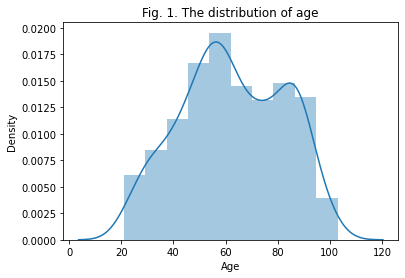

In [54]:
sns.distplot(data_extracted[(data_extracted['Age'] > 20) & (data_extracted['Age'] < 121)]['Age'])
plt.title('Fig. 1. The distribution of age')
plt.show()

As is shown in Fig. 1, the distribution of age is a little similar to the bell curve, but with twin peaks (in the 55-60 and the 80-85).

#### (2) Second, I analyzed the characteristic of "location". 
It is worth noting that the data of location are confusing form of expression, and I need to process them in advance.

In [55]:
data_extracted['Location'].count() / data_extracted.shape[0]

0.9152892561983471

There are some missing data.

In [56]:
data_for_analyzing_location = data_extracted

In [57]:
data_for_analyzing_location.dropna(subset=['Location'], inplace=True)

In [58]:
data_for_analyzing_location['Location'].value_counts()

National/EAST /Edinburgh City Council/Responder Service                                    92
National/North/Aberdeen City Council/Raeden Care Home/Aberdeen C@H                         43
National/EAST /Edinburgh City Council/Edinburgh West LFC C@H                               29
National/EAST /Edinburgh City Council/Edinburgh East Abbey C@H                             21
National/WEST /Glasgow City Council/Glasgow West C@H                                       18
National/North/Dundee City Council/Ardler & St Marys C@H                                   14
National/North/Dundee City Council/Douglas & B/Ferry C@H                                   14
National/EAST /Edinburgh City Council/Edinburgh East Fortune Place C@H                     14
National/North/Dundee City Council/Menzieshill C@H                                         14
National/North/Stirling Council/Forth Valley C@H                                           11
Dundee City Council/Douglas & Broughty Ferry                

It can be seen that there are some locations that the actual positions are the same, but the naming format is different. This situation needs to be handled.

I built a dictionary, which can be used for replace location words.

In [59]:
dict = {"Dundee City Council/Douglas & Broughty Ferry": "National/North/Dundee City Council/Douglas & Broughty Ferry", "Dundee City Council/Ardler & St Mary's": "National/North/Dundee City Council/Ardler & St Mary's", "Dundee City Council/Menzieshill": "National/North/Dundee City Council/Menzieshill", "Dundee City Council/Charleston": "National/North/Dundee City Council/Charleston", "Aberdeen Council/Aberdeen": "National/North/Aberdeen City Council/Raeden Care Home/Aberdeen C@H", "Ayr/STH Ayshire St Leonards": "National/WEST /South Ayrshire Council/South Ayrshire C@H/St Leonards", "Test Machines Live": "Test Machines Live/Test Region/Test Area/Test Locality/Test Complex/Test Building", "Aberdeen Council/Aberdeen/Raeden Court": "National/North/Aberdeen City Council/Aberdeen/Raeden Court"}

In [60]:
dict

{'Dundee City Council/Douglas & Broughty Ferry': 'National/North/Dundee City Council/Douglas & Broughty Ferry',
 "Dundee City Council/Ardler & St Mary's": "National/North/Dundee City Council/Ardler & St Mary's",
 'Dundee City Council/Menzieshill': 'National/North/Dundee City Council/Menzieshill',
 'Dundee City Council/Charleston': 'National/North/Dundee City Council/Charleston',
 'Aberdeen Council/Aberdeen': 'National/North/Aberdeen City Council/Raeden Care Home/Aberdeen C@H',
 'Ayr/STH Ayshire St Leonards': 'National/WEST /South Ayrshire Council/South Ayrshire C@H/St Leonards',
 'Test Machines Live': 'Test Machines Live/Test Region/Test Area/Test Locality/Test Complex/Test Building',
 'Aberdeen Council/Aberdeen/Raeden Court': 'National/North/Aberdeen City Council/Aberdeen/Raeden Court'}

In [61]:
data_for_analyzing_location['Location'] = data_for_analyzing_location['Location'].map(lambda x: dict[x] if x in dict else x)

In [62]:
data_for_analyzing_location['Location'].value_counts()

National/EAST /Edinburgh City Council/Responder Service                                    92
National/North/Aberdeen City Council/Raeden Care Home/Aberdeen C@H                         48
National/EAST /Edinburgh City Council/Edinburgh West LFC C@H                               29
National/EAST /Edinburgh City Council/Edinburgh East Abbey C@H                             21
National/WEST /Glasgow City Council/Glasgow West C@H                                       18
National/North/Dundee City Council/Douglas & B/Ferry C@H                                   14
National/North/Dundee City Council/Menzieshill C@H                                         14
National/EAST /Edinburgh City Council/Edinburgh East Fortune Place C@H                     14
National/North/Dundee City Council/Ardler & St Marys C@H                                   14
National/North/Stirling Council/Forth Valley C@H                                           11
National/North/Dundee City Council/Douglas & Broughty Ferry 

I found that there was an unsuccessful replacement, such as 'Ayr/STH Ayshire St Leonards'. And I fount there is a space character at the end of 'Ayr/STH Ayshire St Leonards', which is not easy to notice.

In [63]:
data_for_analyzing_location[data_for_analyzing_location['Location'] == 'Ayr/STH Ayshire St Leonards ']

,ExternalID,Gender,Location,Age,CareSysCondition
461957,5533.0,Female,Ayr/STH Ayshire St Leonards,69.0,Arthritis
473845,7738.0,Male,Ayr/STH Ayshire St Leonards,76.0,Diabetes


Therefore, I revised the dictionary.

In [64]:
dict = {"Dundee City Council/Douglas & Broughty Ferry": "National/North/Dundee City Council/Douglas & Broughty Ferry", "Dundee City Council/Ardler & St Mary's": "National/North/Dundee City Council/Ardler & St Mary's", "Dundee City Council/Menzieshill": "National/North/Dundee City Council/Menzieshill", "Dundee City Council/Charleston": "National/North/Dundee City Council/Charleston", "Aberdeen Council/Aberdeen": "National/North/Aberdeen City Council/Raeden Care Home/Aberdeen C@H", "Ayr/STH Ayshire St Leonards ": "National/WEST /South Ayrshire Council/South Ayrshire C@H/St Leonards", "Test Machines Live": "Test Machines Live/Test Region/Test Area/Test Locality/Test Complex/Test Building", "Aberdeen Council/Aberdeen/Raeden Court": "National/North/Aberdeen City Council/Aberdeen/Raeden Court"}

In [65]:
data_for_analyzing_location['Location'] = data_for_analyzing_location['Location'].map(lambda x: dict[x] if x in dict else x)

In [66]:
data_for_analyzing_location['Location'].value_counts()

National/EAST /Edinburgh City Council/Responder Service                                    92
National/North/Aberdeen City Council/Raeden Care Home/Aberdeen C@H                         48
National/EAST /Edinburgh City Council/Edinburgh West LFC C@H                               29
National/EAST /Edinburgh City Council/Edinburgh East Abbey C@H                             21
National/WEST /Glasgow City Council/Glasgow West C@H                                       18
National/North/Dundee City Council/Douglas & B/Ferry C@H                                   14
National/North/Dundee City Council/Menzieshill C@H                                         14
National/EAST /Edinburgh City Council/Edinburgh East Fortune Place C@H                     14
National/North/Dundee City Council/Ardler & St Marys C@H                                   14
National/North/Stirling Council/Forth Valley C@H                                           11
National/North/Dundee City Council/Douglas & Broughty Ferry 

I selected a wider representation of location (east, north, west) for subsequent analysis.  

In [67]:
data_for_analyzing_location = data_for_analyzing_location[data_for_analyzing_location['Location'].str.slice(0, 9) == 'National/']

In [68]:
data_for_analyzing_location.insert(3, 'Location_1', data_for_analyzing_location['Location'].str.slice(9, 14))

In [69]:
data_for_analyzing_location

,ExternalID,Gender,Location,Location_1,Age,CareSysCondition
0,8899.0,Male,National/WEST /Glasgow City Council/Glasgow Ea...,WEST,58.0,Cancer
337,9181.0,Female,National/North/Aberdeen City Council/Raeden Ca...,North,93.0,Elderly Care/Support
4911,7901.0,Male,National/North/Aberdeen City Council/Raeden Ca...,North,70.0,NaN
28461,5535.0,Female,National/WEST /South Ayrshire Council/South Ay...,WEST,66.0,NaN
88811,9402.0,Male,National/EAST /Edinburgh City Council/Edinburg...,EAST,32.0,Brain Injury
...,...,...,...,...,...,...
475314,5962.0,Male,National/EAST /Edinburgh City Council/Edinburg...,EAST,77.0,NaN
475419,5475.0,Male,National/North/Dundee City Council/Menzieshill,North,54.0,Stroke
475521,5657.0,Male,National/EAST /Edinburgh City Council/Edinburg...,EAST,88.0,Dementia
475525,5071.0,Male,National/North/North Housing,North,56.0,Learning Difficulties


In [70]:
data_for_analyzing_location['Location_1'].value_counts()

EAST     198
North    155
WEST      85
Name: Location_1, dtype: int64

Then, I can see the number of people in different locations (west, north, east).

<function matplotlib.pyplot.show(close=None, block=None)>

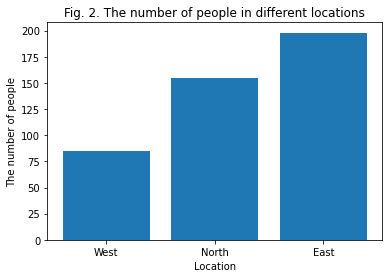

In [71]:
plt.bar(['West','North','East'], data_for_analyzing_location['Location_1'].value_counts(ascending=True))
plt.xlabel('Location')
plt.ylabel('The number of people')
plt.title('Fig. 2. The number of people in different locations')
plt.show

From Fig. 2, it can be seen that there are more users in East than that in West or North.

#### (3) Third, I analyzed the relationship between “location” and “age” of people.

Text(0.5, 1.0, 'Fig. 3. Relationship between location and age of people')

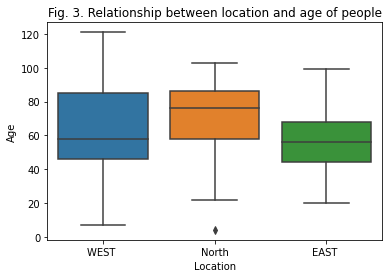

In [72]:
sns.boxplot(x = 'Location_1', y = 'Age', data = data_for_analyzing_location)
plt.xlabel('Location')
plt.title('Fig. 3. Relationship between location and age of people')

As is shown in Fig. 3, the users in North are order. And I found an outlier in North. 

In [73]:
data_for_analyzing_location[(data_for_analyzing_location['Location_1'] == 'North') & (data_for_analyzing_location['Age'] < 20)]

,ExternalID,Gender,Location,Location_1,Age,CareSysCondition
461887,5749.0,Female,National/North/Dundee City Council/Menzieshill,North,4.0,Multiple Sclerosis


A girl is 4 years old with multiple sclerosis.

#### (4) Fourth, I analyzed the relationship between "location" and "gender" of people.

Text(0.5, 1.0, 'Fig. 4. Relationship between location and gender')

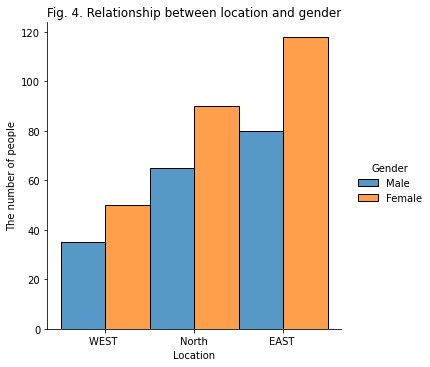

In [74]:
sns.displot(data_for_analyzing_location, x ="Location_1", hue="Gender", multiple="dodge")
plt.xlabel('Location')
plt.ylabel('The number of people')
plt.title('Fig. 4. Relationship between location and gender')

From Fig. 4, it is obvious that the number of female is greater than that of male in three regions. And the numbers of men and women are increasing in the West, north and East.

#### (5) Fifth, I wonder to explore the relationship between "location" and "health" of people.

In [75]:
data_for_analyzing_location['CareSysCondition'].count() / data_for_analyzing_location.shape[0]

0.8036529680365296

It is obvious that there are missing data in 'CareSysCondition'.

In [76]:
tmp_data_for_analyzing_location = data_for_analyzing_location

In [77]:
tmp_data_for_analyzing_location

,ExternalID,Gender,Location,Location_1,Age,CareSysCondition
0,8899.0,Male,National/WEST /Glasgow City Council/Glasgow Ea...,WEST,58.0,Cancer
337,9181.0,Female,National/North/Aberdeen City Council/Raeden Ca...,North,93.0,Elderly Care/Support
4911,7901.0,Male,National/North/Aberdeen City Council/Raeden Ca...,North,70.0,NaN
28461,5535.0,Female,National/WEST /South Ayrshire Council/South Ay...,WEST,66.0,NaN
88811,9402.0,Male,National/EAST /Edinburgh City Council/Edinburg...,EAST,32.0,Brain Injury
...,...,...,...,...,...,...
475314,5962.0,Male,National/EAST /Edinburgh City Council/Edinburg...,EAST,77.0,NaN
475419,5475.0,Male,National/North/Dundee City Council/Menzieshill,North,54.0,Stroke
475521,5657.0,Male,National/EAST /Edinburgh City Council/Edinburg...,EAST,88.0,Dementia
475525,5071.0,Male,National/North/North Housing,North,56.0,Learning Difficulties


In [78]:
tmp_data_for_analyzing_location.dropna(subset=['CareSysCondition'], inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [79]:
tmp_data_for_analyzing_location

,ExternalID,Gender,Location,Location_1,Age,CareSysCondition
0,8899.0,Male,National/WEST /Glasgow City Council/Glasgow Ea...,WEST,58.0,Cancer
337,9181.0,Female,National/North/Aberdeen City Council/Raeden Ca...,North,93.0,Elderly Care/Support
88811,9402.0,Male,National/EAST /Edinburgh City Council/Edinburg...,EAST,32.0,Brain Injury
88868,5542.0,Male,National/WEST /South Ayrshire Council/South Ay...,WEST,58.0,Epilepsy
111365,4763.0,Male,National/North/Dundee City Council/Menzieshill...,North,65.0,Cerebral Palsy
...,...,...,...,...,...,...
474016,5966.0,Male,National/EAST /Edinburgh City Council,EAST,85.0,Elderly Care/Support
475419,5475.0,Male,National/North/Dundee City Council/Menzieshill,North,54.0,Stroke
475521,5657.0,Male,National/EAST /Edinburgh City Council/Edinburg...,EAST,88.0,Dementia
475525,5071.0,Male,National/North/North Housing,North,56.0,Learning Difficulties


Text(0.5, 1.0, 'Fig. 5. Relationship between location and health')

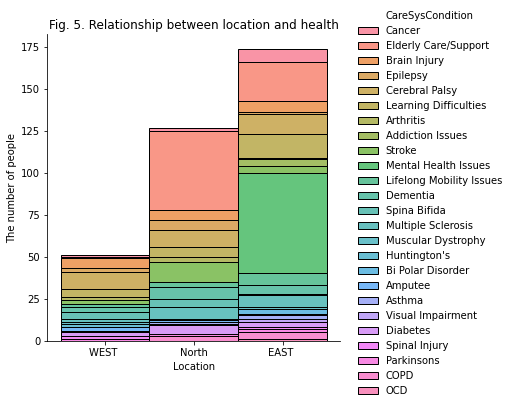

In [80]:
sns.displot(tmp_data_for_analyzing_location, x="Location_1", hue="CareSysCondition", multiple="stack")
plt.xlabel('Location')
plt.ylabel('The number of people')
plt.title('Fig. 5. Relationship between location and health')

As is shown in Fig. 5, In gerneal, the east had the highest number of users with illness, followed by the north and the west. In specific, the people with cerebral Palsy are most in West. The people with elderly care/support are most in North. The people with mental health issues are most in East.

#### (6) Last, I analyzed the relationship between "location" and "Link Title".

In [81]:
data_extracted_second = data_of_all.iloc[:,[5, 6, 13]].drop_duplicates()

In [82]:
data_extracted_second

,Link Title,Link Type,Location_y
0,My Care Team,Category,National/WEST /Glasgow City Council/Glasgow Ea...
1,My Care,Category,National/WEST /Glasgow City Council/Glasgow Ea...
2,Care Notes,Internet,National/WEST /Glasgow City Council/Glasgow Ea...
8,Local Information - Glasgow,Category,National/WEST /Glasgow City Council/Glasgow Ea...
9,My Neighbourhood,Category,National/WEST /Glasgow City Council/Glasgow Ea...
...,...,...,...
475729,Bowling,HTML page,Arbroath
475734,Roy Orbison,Internet,Arbroath
475738,Classic EastEnders Channel,Internet,Arbroath
475739,Coronation Street,Internet,Arbroath


In [83]:
data_extracted_second.count() / data_extracted_second.shape[0]

Link Title    1.000000
Link  Type    1.000000
Location_y    0.959724
dtype: float64

In [84]:
data_extracted_second.rename(columns={'Location_y':'Location'}, inplace=True)

In [85]:
data_extracted_second.dropna(subset=['Location'], inplace=True)

In [86]:
data_extracted_second['Location'] = data_extracted_second['Location'].map(lambda x: dict[x] if x in dict else x)

In [87]:
data_extracted_second['Location'].value_counts() / data_extracted_second.shape[0]

National/North/Aberdeen City Council/Raeden Care Home/Aberdeen C@H                         0.115308
National/EAST /Edinburgh City Council/Responder Service                                    0.070344
National/WEST /South Ayrshire Council/South Ayrshire C@H/St Leonards /St Leonards Court    0.064948
National/EAST /Edinburgh City Council/Edinburgh West LFC C@H                               0.058553
National/North/Dundee City Council/Charleston C@H                                          0.056954
National/North/Dundee City Council/Menzieshill C@H                                         0.051359
National/WEST /Glasgow City Council/Glasgow West C@H                                       0.047162
National/EAST /Edinburgh City Council/Edinburgh East Abbey C@H                             0.033173
National/North/Stirling Council/Forth Valley C@H                                           0.032374
National/WEST /Glasgow City Council/Glasgow East C@H/Helenvale/67 Glamis Road              0.031775


In [88]:
data_extracted_second = data_extracted_second[data_extracted_second['Location'].str.slice(0, 9) == 'National/']

In [89]:
data_extracted_second.insert(3, 'Location_1', data_extracted_second['Location'].str.slice(9, 14))

In [90]:
data_extracted_second

,Link Title,Link Type,Location,Location_1
0,My Care Team,Category,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
1,My Care,Category,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
2,Care Notes,Internet,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
8,Local Information - Glasgow,Category,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
9,My Neighbourhood,Category,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
...,...,...,...,...
475622,Tayside: New Digital Skills Intern,Internet,National/North/Dundee City Council/Menzieshill,North
475625,Candy Crush Saga,Internet,National/North/Dundee City Council/Menzieshill,North
475658,Dundee United Football Club,Internet,National/North/Dundee City Council/Menzieshill,North
475676,Sudoku,Internet,National/North/Dundee City Council/Menzieshill,North


In [91]:
(data_extracted_second['Link  Type'].value_counts() / data_extracted.shape[0]).head(10)

Internet         7.663657
Category         2.715576
Radio            0.239278
HTML page        0.112867
Services         0.058691
Standard page    0.051919
TV               0.036117
Gallery          0.024831
Name: Link  Type, dtype: float64

In [92]:
data_extracted_second_for_link_type = data_extracted_second[(data_extracted_second['Link  Type'] == 'Internet') | (data_extracted_second['Link  Type'] == 'Category') | (data_extracted_second['Link  Type'] == 'Radio') | (data_extracted_second['Link  Type'] == 'HTML page')]

In [93]:
data_extracted_second_for_link_type

,Link Title,Link Type,Location,Location_1
0,My Care Team,Category,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
1,My Care,Category,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
2,Care Notes,Internet,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
8,Local Information - Glasgow,Category,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
9,My Neighbourhood,Category,National/WEST /Glasgow City Council/Glasgow Ea...,WEST
...,...,...,...,...
475622,Tayside: New Digital Skills Intern,Internet,National/North/Dundee City Council/Menzieshill,North
475625,Candy Crush Saga,Internet,National/North/Dundee City Council/Menzieshill,North
475658,Dundee United Football Club,Internet,National/North/Dundee City Council/Menzieshill,North
475676,Sudoku,Internet,National/North/Dundee City Council/Menzieshill,North


Text(0.5, 1.0, 'Fig. 6. Relationship between location and link type')

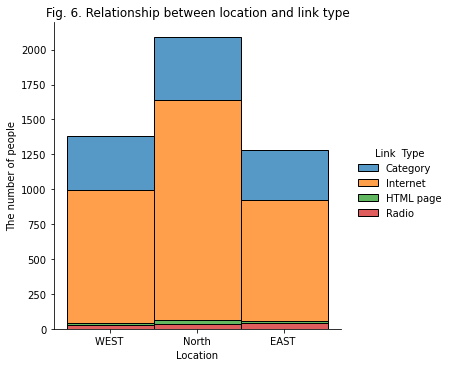

In [94]:
sns.displot(data_extracted_second_for_link_type, x="Location_1", hue="Link  Type", multiple="stack")
plt.xlabel('Location')
plt.ylabel('The number of people')
plt.title('Fig. 6. Relationship between location and link type')

Text(0.5, 1.0, 'Fig. 7. Relationship between Link type and location')

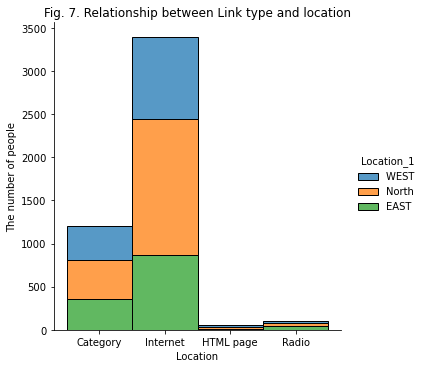

In [95]:
sns.displot(data_extracted_second_for_link_type, x="Link  Type", hue="Location_1", multiple="stack")
plt.xlabel('Location')
plt.ylabel('The number of people')
plt.title('Fig. 7. Relationship between Link type and location')

According to Fig.6 and Fig.7, it can be seen that "category" and "Internet" are the most popular types of entertainment activities conducted by users in the eastern, western and northern regions. And more specifically, "Internet" is a much larger type than "category". But in terms of the number of people, users in the north have the highest number of entertainment activities.



Overall, Combined with Fig. 3, the results of Fig. 5 can be explained. In the North area, people are generally 60-85 years old. The demand for service of elderly care and support is high. Thus, the people with elderly care are most. In the East area, people are 40-70 years old. They face retirement, changing pace of life and menopause stress and so on. Thus, their mental health will be prone to problems.

It is worth noting that the number of people with cancer is high in East area, which may lead to our inquiry of next stage.

# Ⅲ.  Reflect and Hypothesis 

##### Q1: A 200 word reflection on the data 

Based on the above analysis, I firstly realized that in the middle-aged and elderly groups, the age differences within them can lead to different needs in their lives. This also inspires me that when I design for olderly groups, it is important to notice the composition of their age. And I should study carefully the physiological and psychological characteristics of different age groups. Secondly, the characteristics of gender are noteworthy. In the above results, users in each area are more female than male, indicating that their demand for this kind of care service is stronger, which will cause me to think about whether olderly women in real life are more inconvenient than olderly men on some occasions. Besides, I think the difference of health needs for eldly people (as shown in Fig. 5) in the east, west and north may be directly related to the actual economic level and the development of medical care in these areas. Meanwhile, It is worth noting that the East area has significantly more users than the other areas, and the apparent youth of users' age structure may also be related to the culture of the East area and the residents' abilities to accept the new service.

##### Q2: 3-5 hypotheses with an explanation of: (1) What your hypothesis is; (2) Why you think that (referring to your graphs); (3) How you could go about testing it (note that this may include: further studies, asking the data owner, using some advanced algorithms, check each data point individually, etc.)

Hypothesis 1: Men are harder to become users of the company than women. It can be seen from Fig. 2 that there are fewer male users than female users in all three locations. For testing the hypothesis, I think it is possible to enrich the data and validate it by interviewing male and female users, or by consulting the data owner.

Hypothesis 2: Middle-aged women in East area may face more psychological stress. The reasons for my assumption are based on the results of Figs. 3, 4 and 5. Fig. 3 shows that users in East area are relatively young, are the middle-aged and elderly groups. Fig. 4 shows that the proportion of female in all three areas is higher than that of male in terms of gender composition. However, in Fig. 5, the number of people in East area are significantly higher in terms of psychological stress than in the other two areas, suggesting that the cause may be age-related. Thus, I speculate that middle-aged women may face greater psychological pressure, which is also related to the actual female menopause, post-retirement life. To test this hypothesis, I needed to analyze the age composition and sex ratio of people with mental health issues in East area, and compare three areas based on the two indicators.

Hypothesis 3: The main requirement for people who are 55-60 years old is mainly elderly care/support, and the main requirement for people who are 80-85 years old is solving mental health issues. As is shown in Fig. 1, there are two peaks in the users' distribution of age, one is 55-60, the other one is 80-85, and the number of the former is more than the latter. The hypothesis was proposed in view of the results of Fig. 3 and Fig. 5. To verify this hypothesis, the age composition of elderly care and mental health issues in Fig. 5 needs to be analyzed.